In [3]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')
import cv2
import trackpy as tp
from matplotlib import cm

from scipy.fftpack import fft
from timeit import default_timer as timer
from math import sqrt



In [4]:
import numpy as np
np.version.version

'1.15.0'

In [5]:
from skimage import data

In [6]:
import cv2
print(cv2.__version__)

3.4.0


In [7]:

from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray


In [8]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims



In [9]:
#image = frames[100*10]
#image_gray = rgb2gray(image)
#start = timer()
#blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)
#end = timer()
#y=blobs_doh[:,0]
#x=blobs_doh[:,1]
#r=blobs_doh[:,2]
#plt.scatter(x,y,alpha=0.2,s=100)
#plt.imshow(image)

In [10]:
# get the frame number of video
cap = cv2.VideoCapture("ref_01.avi")
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print( length )

2964


In [11]:
frames=pims.Video('ref_01.avi')
# first three minutues
#frames=frames[9300:9300+18000]

In [12]:
frames=frames[:1500]
w,l,_=frames[1].shape

Frame([[[  4,   4,   4],
        [  1,   1,   1],
        [ 10,  10,  10],
        ...,
        [131, 131, 131],
        [131, 131, 131],
        [130, 130, 130]],

       [[  3,   3,   3],
        [  9,   9,   9],
        [  7,   7,   7],
        ...,
        [131, 131, 131],
        [131, 131, 131],
        [132, 132, 132]],

       [[  0,   0,   0],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [131, 131, 131],
        [133, 133, 133],
        [130, 130, 130]],

       ...,

       [[  3,   3,   3],
        [ 21,  21,  21],
        [ 20,  20,  20],
        ...,
        [130, 130, 130],
        [130, 130, 130],
        [127, 127, 127]],

       [[ 10,  10,  10],
        [ 15,  15,  15],
        [ 15,  15,  15],
        ...,
        [126, 126, 126],
        [130, 130, 130],
        [127, 127, 127]],

       [[ 10,  10,  10],
        [  9,   9,   9],
        [ 14,  14,  14],
        ...,
        [130, 130, 130],
        [128, 128, 128],
        [128, 128, 128]]], dtype=uint8)
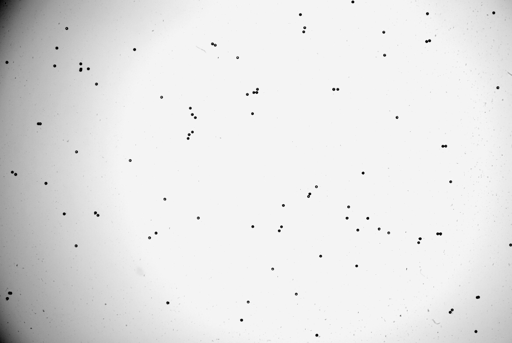

In [13]:
frames[2]

In [14]:
new_frame=np.zeros((len(frames),w, l))

In [15]:
for i in range(len(frames)-1):
    new_frame[i]=cv2.cvtColor(frames[i], cv2.COLOR_BGR2GRAY)
    if i%100==0:
        print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400


In [16]:
import trackpy as tp
from matplotlib import cm

In [27]:
start = timer()
f = tp.locate(new_frame[100],19, invert=True,minmass=2000)
end = timer()
print(end - start)

0.1870703919994412


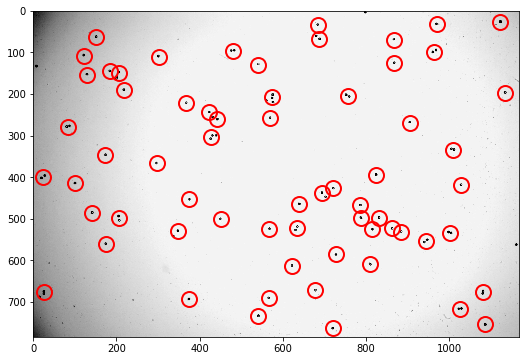

In [28]:
plt.figure()  # make a new figure
tp.annotate(f, new_frame[100]);

In [29]:
f.head()

,y,x,mass,size,ecc,signal,raw_mass,ep
9,27.275109,1122.913785,3931.855477,2.483654,0.017084,133.592455,-32509.0,0.019130
12,32.471542,969.506083,4208.456596,2.603044,0.061145,143.597177,-37014.0,0.033674
14,34.749117,683.916479,3664.082054,2.483159,0.062991,129.472864,-38256.0,0.042604
40,63.690341,151.753977,3107.348738,2.590045,0.009915,96.516135,-28446.0,0.013767
47,67.602612,687.569317,4100.758714,3.831594,0.166449,136.535020,-37127.0,0.034329


(array([392.,   1.,   0.,   1.,  33.,  16.,   0.,   4.,   6.,   4.]),
 array([  12.35877339,  767.53867888, 1522.71858437, 2277.89848986,
        3033.07839535, 3788.25830084, 4543.43820632, 5298.61811181,
        6053.7980173 , 6808.97792279, 7564.15782828]),
 <a list of 10 Patch objects>)

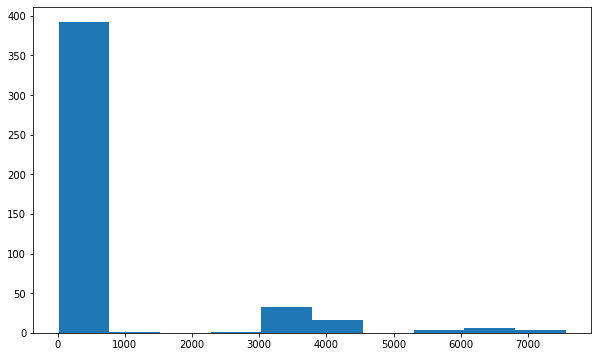

In [26]:
plt.hist(f['mass'])

In [31]:
f = tp.batch( new_frame, 19, invert=True,minmass=2000);

Frame 1499: 0 features


In [83]:
t = tp.link_df(f,5, memory=5)

In [84]:
t_ref = tp.filter_stubs(t, 200)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t_ref['particle'].nunique())
print('After:', t_ref['particle'].nunique())

Before: 25
After: 25


In [85]:
set(t_ref['particle'])

{4,
 9,
 12,
 14,
 17,
 19,
 20,
 21,
 25,
 31,
 36,
 38,
 40,
 42,
 48,
 51,
 52,
 53,
 56,
 58,
 59,
 60,
 61,
 249,
 1155}

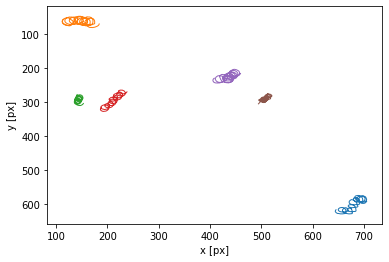

In [146]:
#t_L1=t1
plt.figure()
tp.plot_traj(t_50hz);

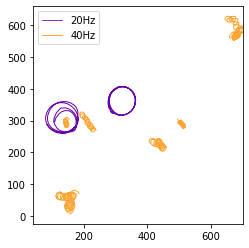

In [163]:
fig, ax = plt.subplots()

for i in list(set(t_20hz["particle"])):
    t_20_1=t_20hz[t_20hz["particle"]==i]
    plt.plot(t_20_1['x'],t_20_1['y'],linewidth=1,c=cm.plasma(0.2))
plt.plot(t_20_1['x'],t_20_1['y'],linewidth=0.8,c=cm.plasma(0.2),label="20Hz")
for i in list(set(t_40hz["particle"])):
    t_40_1=t_40hz[t_40hz["particle"]==i]
    plt.plot(t_40_1['x'],t_40_1['y'],linewidth=1,c=cm.plasma(0.8))
plt.plot(t_40_1['x'],t_40_1['y'],linewidth=1,c=cm.plasma(0.8),label="40Hz")
for i in list(set(t_50hz["particle"])):
    t_50_1=t_50hz[t_50hz["particle"]==i]
    plt.plot(t_50_1['x'],t_50_1['y'],linewidth=1,c=cm.plasma(0.8))
plt.xlim(40,700)
plt.legend(loc="best")
ax.set_aspect('equal')

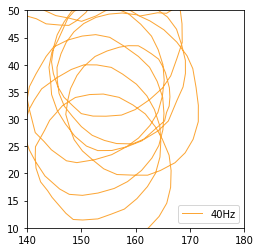

In [176]:
fig, ax = plt.subplots()
for i in list(set(t_40hz["particle"])):
    t_40_1=t_40hz[t_40hz["particle"]==i]
    plt.plot(t_40_1['x'],t_40_1['y'],linewidth=1,c=cm.plasma(0.8))
plt.plot(t_40_1['x'],t_40_1['y'],linewidth=1,c=cm.plasma(0.8),label="40Hz")
for i in list(set(t_50hz["particle"])):
    t_50_1=t_50hz[t_50hz["particle"]==i]
    plt.plot(t_50_1['x'],t_50_1['y'],linewidth=1,c=cm.plasma(0.8))
plt.xlim(140,180)
plt.ylim(10,50)
plt.legend(loc="best")
ax.set_aspect('equal')

In [143]:
t1=t_40hz
l=list(set(np.sort(t1['particle'].values)))
for i, value in enumerate(l):
    posi=t1.loc[t1['particle'] == int(value)][['x','y']]
    if (np.linalg.norm((posi.iloc[1]-posi.iloc[0]).values))<2:
        t1 = t1[t1.particle!=int(value) ]
t_40hz=t1

In [70]:
[t_40hz,t_20hz]

[                y           x          mass      size       ecc      signal  \
 frame                                                                         
 0      408.512204  590.892139   4836.337956  2.348916  0.019118  177.066214   
 0      468.436044  368.238558   5177.450809  2.399916  0.025003  180.538100   
 0      525.335978   60.878986   5580.189648  2.390290  0.032779  194.425646   
 0      627.497846  123.553077   5641.815634  2.510746  0.030954  195.293618   
 0      721.872698   92.049340  11311.406361  3.827764  0.370969  186.613902   
 0      566.007618  664.694652   5469.089279  2.351442  0.061107  197.029561   
 0      356.075792  133.737852   9860.157786  4.056261  0.505488  178.802157   
 0      549.470267  796.507882   5561.094272  2.524919  0.041725  189.217817   
 0       27.533791  817.503738   5689.554074  2.503087  0.047249  197.897533   
 0       30.332777  894.235705   5722.536997  2.404051  0.048465  200.501448   
 0       48.355379  247.030675   5800.65

In [184]:
len(set(t_ref['particle'].values))

14

In [56]:
#t_3L1['particle'].replace(1, 27,inplace=True)

In [157]:
t_ref.to_csv("2.4fps7.5degre3.csv",encoding='utf-8')


In [58]:
t1=t_ref
posi=t1.loc[t1['particle'] == int(2)][['x','y']]
np.linalg.norm((posi.iloc[1]-posi.iloc[0]).values)

7.557966013171616

In [151]:
# delete particle is not moving
t1=t_ref
l=list(set(np.sort(t1['particle'].values)))
for i, value in enumerate(l):
    posi=t1.loc[t1['particle'] == int(value)][['x','y']]
    if (np.linalg.norm((posi.iloc[1]-posi.iloc[0]).values))<1:
        t1 = t1[t1.particle!=int(value) ]
t_ref=t1

In [5]:
import pandas as pd

In [522]:
t_reference=pd.read_csv('reference_horinontal.csv')
t_L1=pd.read_csv('Lleft01.csv')
t_L2=pd.read_csv('Lleft02.csv')
t_3L1=pd.read_csv('3Lleft01.csv')
t_3L2=pd.read_csv('3Lleft02.csv')

In [531]:
def velocity(input):
    t1=input
    fps=2
    scale=0.87
    velocity_me=[]
    for i in set(t1['particle'].values):

        net=np.linalg.norm(np.diff(t1.loc[t1['particle']==i][['x','y']].values,axis=0),axis=1)* fps*scale
        net2=[np.sum(net[:j])/fps for j in range(1,len(net))]
        #realframes=np.argmax(np.gradient(net2, 2)<0.09)
        #if  realframes==0:
           # realframes=t1['frame'].max()
        realframes=t1['frame'].max()
        distance=net2[-1]
        velocity_me.append(distance/((realframes+1)/fps))
    return [net,net2, velocity_me]

array([[483.01293019, 482.95445216, 483.62708436, ..., 447.90756657,
        447.73061682, 447.58415671],
       [424.42522124, 416.55810771, 408.42550567, ..., 555.66287496,
        547.71691937, 539.53294957]])

(0, 0.4)

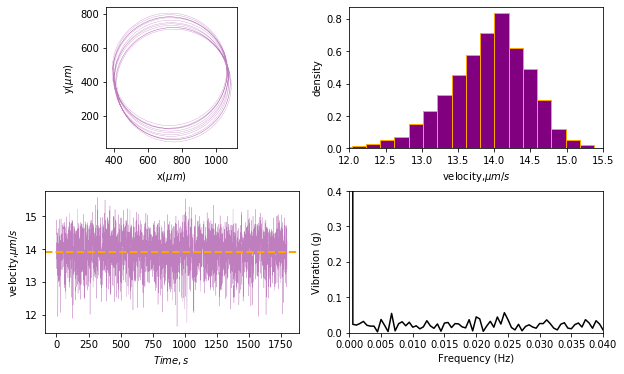

In [655]:
plt.figure()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
ax1=plt.subplot(221)
plt.plot(t_reference[['x']].values*scale,t_reference[['y']].values*scale,color='purple',alpha=0.5,linewidth=0.3)
plt.xlabel("x($\mu m$) ")
plt.ylabel("y($\mu m$) ")
ax1.set_aspect(1)

ax2=plt.subplot(222)
plt.hist(velocity(t_reference)[0],20, density=True, facecolor='purple',edgecolor='orange', alpha=1)
plt.xlabel("velocity,$\mu m/s$ ")
plt.ylabel("density")
plt.xlim(12,15.5)

ax3=plt.subplot(223)
plt.plot(np.arange(3600)/2,velocity(t_reference)[0],color='purple',alpha=0.5,linewidth=0.3)
plt.axhline(y=velocity(t_reference)[2], linewidth=2, color="orange",linestyle='dashed')
plt.xlabel("$Time,s$")
plt.ylabel("velocity,$\mu m/s$ ")
#plt.xlim(12,15.5)

N=len(velocity(t_reference)[0])
sampling_rate =2
T = 1/sampling_rate 
x = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
yr = fft( velocity(t_reference)[0]) # "raw" FFT with both + and - frequencies
y = 2/N * np.abs(yr[0:np.int(N/2)]) # positive freqs only


ax3=plt.subplot(224)
plt.plot(x, y,color='black')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.xlim(0,0.04)
plt.ylim(0,0.4)

#plt.xlim(12,15.5)


(0, 0.4)

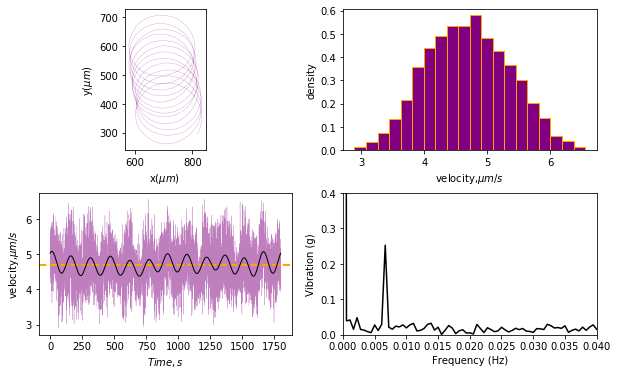

In [704]:
plt.figure()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
ax1=plt.subplot(221)
plt.plot(t_L1[['x']].values*scale,t_L1[['y']].values*scale,color='purple',alpha=0.5,linewidth=0.3)
plt.xlabel("x($\mu m$) ")
plt.ylabel("y($\mu m$) ")
ax1.set_aspect(1)

ax2=plt.subplot(222)
plt.hist(velocity(t_L1)[0],20, density=True, facecolor='purple',edgecolor='orange', alpha=1)
plt.xlabel("velocity,$\mu m/s$ ")
plt.ylabel("density")
#plt.xlim(12,15.5)

rft = np.fft.rfft(velocity(t_L1)[0])
rft[15:] = 0   # Note, rft.shape = 21
y_smooth = np.fft.irfft(rft)


####
ax3=plt.subplot(223)
plt.plot(np.arange(3600)/2,velocity(t_L1)[0],color='purple',alpha=0.5,linewidth=0.3)
plt.axhline(y=velocity(t_L1)[2], linewidth=2, color="orange",linestyle='dashed')
plt.plot( np.arange(3600)/2,y_smooth, label='Smoothed',color='black',alpha=1,linewidth=1)
plt.xlabel("$Time,s$")
plt.ylabel("velocity,$\mu m/s$ ")
#plt.xlim(12,15.5)

N=len(velocity(t_reference)[0])
sampling_rate =2
T = 1/sampling_rate 
x = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
yr = fft( velocity(t_L1)[0]) # "raw" FFT with both + and - frequencies
y = 2/N * np.abs(yr[0:np.int(N/2)]) # positive freqs only


ax3=plt.subplot(224)
plt.plot(x, y,color='black')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.xlim(0,0.04)
plt.ylim(0,0.4)

#plt.xlim(12,15.5)



(0, 0.4)

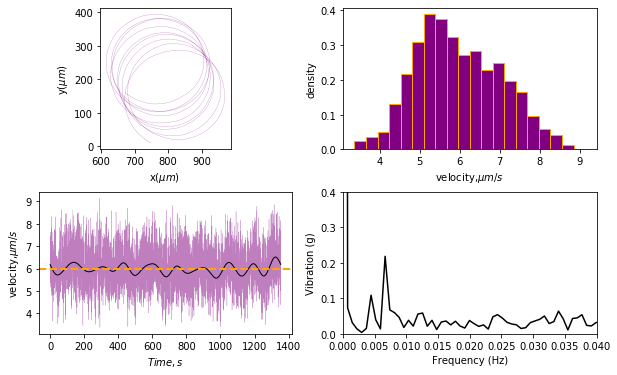

In [715]:
plt.figure()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
ax1=plt.subplot(221)
plt.plot(t_3L2[['x']].values*scale,t_3L2[['y']].values*scale,color='purple',alpha=0.5,linewidth=0.3)
plt.xlabel("x($\mu m$) ")
plt.ylabel("y($\mu m$) ")
ax1.set_aspect(1)

ax2=plt.subplot(222)
plt.hist(velocity(t_3L2)[0],20, density=True, facecolor='purple',edgecolor='orange', alpha=1)
plt.xlabel("velocity,$\mu m/s$ ")
plt.ylabel("density")
#plt.xlim(12,15.5)
rft = np.fft.rfft(velocity(t_3L2)[0])
rft[15:] = 0   # Note, rft.shape = 21
y_smooth = np.fft.irfft(rft)
###
ax3=plt.subplot(223)
plt.plot(np.arange(2708)/2,velocity(t_3L2)[0],color='purple',alpha=0.5,linewidth=0.3)
plt.plot( np.arange(2708)/2,y_smooth, label='Smoothed',color='black',alpha=1,linewidth=1)
plt.axhline(y=velocity(t_3L2)[2], linewidth=2, color="orange",linestyle='dashed')
plt.xlabel("$Time,s$")
plt.ylabel("velocity,$\mu m/s$ ")
#plt.xlim(12,15.5)

N=len(velocity(t_3L2)[0])
sampling_rate =2
T = 1/sampling_rate 
x = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
yr = fft( velocity(t_3L2)[0]) # "raw" FFT with both + and - frequencies
y = 2/N * np.abs(yr[0:np.int(N/2)]) # positive freqs only


ax3=plt.subplot(224)
plt.plot(x, y,color='black')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.xlim(0,0.04)
plt.ylim(0,0.4)

#plt.xlim(12,15.5)



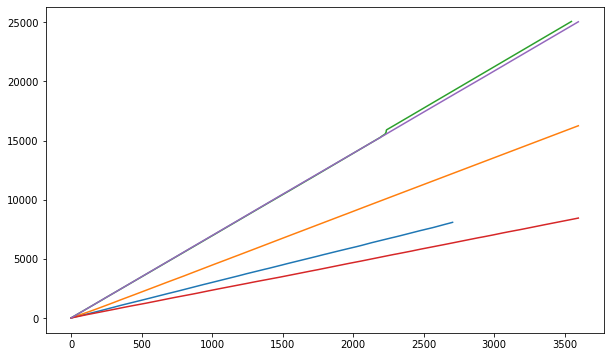

In [532]:
plt.plot(velocity(t_3L2)[1])
plt.plot(velocity(t_3L1)[1])
plt.plot(velocity(t_L2)[1])
plt.plot(velocity(t_L1)[1])
plt.plot(velocity(t_reference)[1])

(0, 2000)

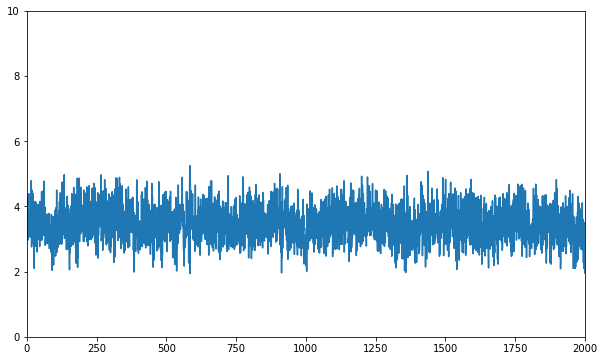

In [506]:
#plt.plot(net_reference)
#plt.plot(net)
#plt.plot(net_L2)
#plt.plot(net_3L1)
plt.plot(net_3L2)
plt.ylim(0,10)
plt.xlim(0,2000)


In [607]:
dx_dt = np.gradient(trac[:, 0])
dy_dt = np.gradient(trac[:, 1])
velocity = np.array([ [dx_dt[i], dy_dt[i]] for i in range(dx_dt.size)])

In [530]:
fps=1
scale=3600/1636
velocity_me=[]
for i in set(t1['particle'].values):
    
    net=np.linalg.norm(np.diff(t1.loc[t1['particle']==i][['x','y']].values,axis=0),axis=1)
    net2=[np.sum(net[:i]) for i in range(1,len(net))]
    #realframes=np.argmax(np.gradient(net2, 2)<0.09)
    #if  realframes==0:
       # realframes=t1['frame'].max()
    realframes=t1['frame'].max()
    distance=net2[-1]
    velocity_me.append(distance*scale/((realframes+1)/fps))

In [535]:
t1['frame'].max()

179

In [307]:
t1.to_csv('electric.csv', encoding='utf-8')

In [539]:
np.mean(velocity_me)
np.std(velocity_me)

1.914308372703426

In [541]:
np.mean(velocity_magnetic)
np.std(velocity_magnetic)

0.6854351710047306

In [542]:
np.mean(velocity_electric)
np.std(velocity_electric)

0.8325345893051683

Text(0, 0.5, 'velocity $\\mu m/s$ ')

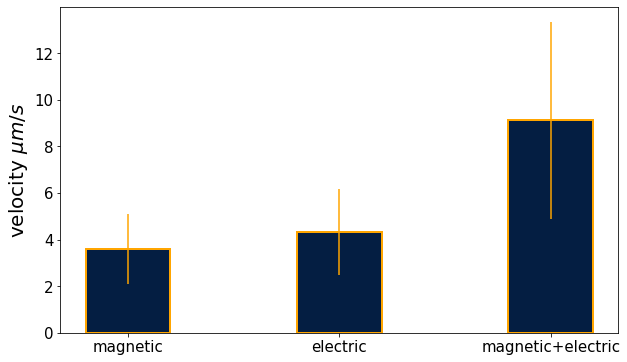

In [620]:
import matplotlib
font = {'family' : 'normal',
       # 'weight' : 'normal',
        'size'   : 15}
matplotlib.rc('font', **font)
mean=np.array([np.mean(velocity_magnetic),np.mean(velocity_electric),np.mean(velocity_me)])*(3600/1636)
std=np.array([np.std(velocity_magnetic),np.std(velocity_electric),np.std(velocity_me)])*(3600/1636)
ind = ['magnetic','electric','magnetic+electric']
width = 0.4  
plt.bar(ind, mean, width, yerr=std, color=[(4/255,30/255,66/255)],ecolor=[(255/255,165/255,0)]\
        ,edgecolor=[(255/255,165/255,0)],linewidth=2)
plt.ylabel('velocity ''$\mu m/s$'' ',fontsize=20)